In [1]:
import paths
import utils

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import astropy.units as u
import astropy.constants as c
import cmasher as cmr
from scipy.integrate import trapezoid, cumulative_trapezoid


plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 14


# update various fontsizes to match
params = {'figure.figsize': (6,4),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.7 * fs,
          'ytick.labelsize': 0.7 * fs}
plt.rcParams.update(params)

# set up the LISA frequency grid
f_LISA = np.logspace(-1, -5, 150) * u.Hz

# set up the LIGO eccentricity range
e_LIGO_lo = np.logspace(-6, -4, 10)
e_LIGO_hi = np.linspace(0.0002, 0.001, 5)
e_LIGO = np.append(e_LIGO_lo, e_LIGO_hi)
e_LIGO = np.append(0, e_LIGO)
e_LIGO_round = np.array([f"{e:.2e}" for e in e_LIGO])

# get the mass, mass ratio, and rate grids and meshgrids
down_samp_fac_q=20
down_samp_fac_m1=10
mass_1, mass_ratio, M1, Q, dN_dm1dqdVcdt = utils.get_LIGO_rate(down_samp_fac_m1=down_samp_fac_m1, down_samp_fac_q=down_samp_fac_q)

MM, QQ, EE_LIGO, FF = np.meshgrid(mass_1, mass_ratio, e_LIGO, f_LISA, indexing='ij')


In [6]:
len(e_LIGO_round)

16

In [3]:
DH = np.load(paths.data / 'horizon_dist.npy')

In [4]:
np.shape(DH)

(100, 25, 16, 150)

In [5]:
np.shape(MM)

(100, 25, 16, 150)

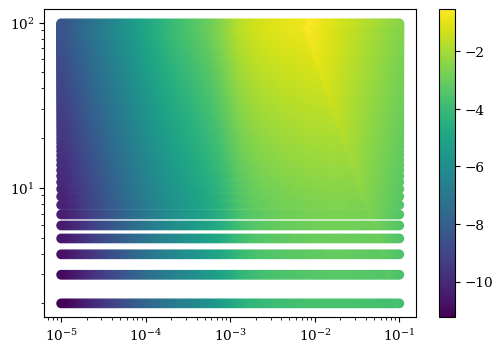

In [10]:
plt.scatter(FF[:,0,0,:], MM[:,0,0,:], c=np.log10(DH[:,0,0,:]))
plt.colorbar()
plt.yscale('log')
plt.xscale('log')


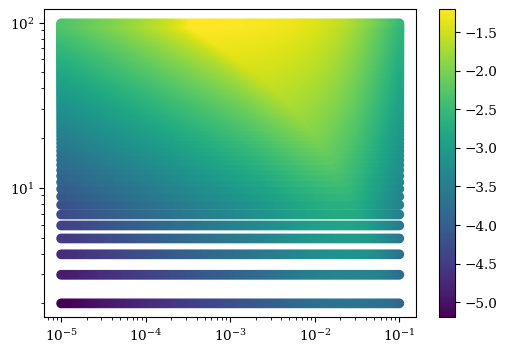

In [14]:
plt.scatter(FF[:,0,15,:], MM[:,0,15,:], c=np.log10(DH[:,0,15,:]))
plt.colorbar()
plt.yscale('log')
plt.xscale('log')


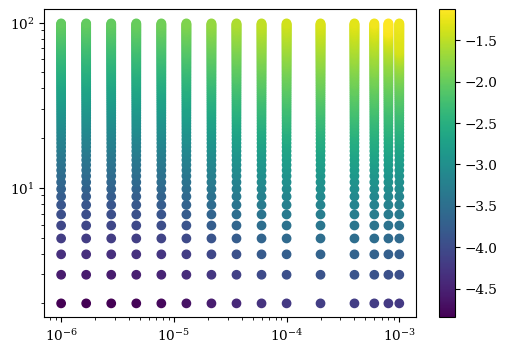

In [19]:
plt.scatter(EE_LIGO[:,0,:,75], MM[:,0,:,75], c=np.log10(DH[:,0,:,75]))
plt.colorbar()
plt.yscale('log')
plt.xscale('log')
